# Project: Wrangling and Analyze Data

## Data Gathering
In the cells below, **all** three pieces of data for this project were gathered and loaded in the notebook. **Note:** the methods required to gather each data are different.

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Import the pandas library
import pandas as pd
# Read the 'twitter-archive-enhanced.csv' file into a pandas DataFrame
# and store it in the variable 'twitter_archive'
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
# Import the 'requests' library to download data from the web
import requests as req
# Define the URL where the image predictions file is hosted
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# Send a GET request to the URL and store the response in a variable
response = req.get(url)
# Create a file named 'image-predictions.tsv'
# Then write the contents of the response to this file
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

In [3]:
# Read the 'image-predictions.tsv' file into a pandas DataFrame
image_preds = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Requests library to download additional data via the Twitter API (tweet_json.txt); Because we can't Use the Tweepy library to query it as it is forbidden for developer account end point

In [4]:
# Define the URL of the tweet JSON data file
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
# Send a GET request to the URL and store the response
response = req.get(url)
# Open (or create) a file named 'tweet_json.txt' in write mode
# Then write the text content (JSON data) from the response into the file
with open('tweet_json.txt', 'w') as file:
    file.write(response.text)

In [5]:
# Import the json library to work with JSON data
import json
# Convert the 'tweet_id' column from the twitter_archive DataFrame to a list of strings
tweet_ids = twitter_archive['tweet_id'].astype(str).tolist()
# Create an empty list to hold selected tweet data
tweets_data = []
# Open the tweet_json.txt file (which contains one tweet JSON per line)
with open('tweet_json.txt', 'r') as file:
        # Loop through each line (i.e., each tweet in JSON format)
    for line in file:
        # Parse the JSON data in the line into a Python dictionary
        tweet = json.loads(line)
        # Check if this tweet's ID is in our list of tweet_ids
        if tweet['id_str'] in tweet_ids:
            # If it is, extract key info and append it to the list
            tweets_data.append({
                'tweet_id': tweet['id_str'],
                'retweet_count': tweet['retweet_count'],
                'favorite_count': tweet['favorite_count']
            })

In [6]:
# Convert the list of tweet dictionaries (tweets_data) into a pandas DataFrame
# Then save it as a CSV file named: 'tweet_data.csv' (without row indices)
pd.DataFrame(tweets_data).to_csv('tweet_data.csv', index=False)
# Read the saved CSV file back into a pandas DataFrame for further analysis
tweets_data = pd.read_csv('tweet_data.csv')

## Assessing Data
In this section, **eight (8) quality issues and two (2) tidiness issue** were detect and document. Then **both** visual assessment
programmatic assessement were used to assess the data.

In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1027,746056683365994496,NaN,NaN,2016-06-23 19:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arlen and Thumpelina. They are best pa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746056683...,11,10,Arlen,None,None,None,None
1496,692530551048294401,NaN,NaN,2016-01-28 02:12:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cody. He's been to like 80 countr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692530551...,10,10,Cody,None,None,None,None
106,871879754684805121,NaN,NaN,2017-06-06 00:01:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lassie. She's celebrating #PrideM...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871879754...,13,10,Lassie,None,None,None,None
1630,684538444857667585,6.844811e+17,4.196984e+09,2016-01-06 00:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After watching this video, we've determined th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684538444...,12,10,None,None,None,None,None
1204,716080869887381504,NaN,NaN,2016-04-02 01:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super majestic doggo and a sunset 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716080869...,11,10,None,doggo,None,None,None


In [9]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [12]:
twitter_archive.describe(include=[object])

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,2356,4,2356,181,2218,957,2,2,2,2
top,2016-05-11 00:43:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I hope you guys enjoy this beautiful snowy pup...,2016-12-09 06:17:20 +0000,https://twitter.com/dog_rates/status/832369877...,None,None,None,None,None
freq,1,2221,1,1,2,745,2259,2346,2099,2326


In [13]:
image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
image_preds.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1870,844704788403113984,https://pbs.twimg.com/media/C7j-hkSW0AIxCZC.jpg,1,Labrador_retriever,0.980213,True,golden_retriever,0.007012,True,beagle,0.003147,True
1525,788412144018661376,https://pbs.twimg.com/media/CvEAqQoWgAADj5K.jpg,1,golden_retriever,0.805238,True,Labrador_retriever,0.113798,True,Brittany_spaniel,0.038559,True
933,703356393781329922,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True
617,680206703334408192,https://pbs.twimg.com/media/CXCUYcRW8AAObYM.jpg,1,Christmas_stocking,0.149758,False,cloak,0.128830,False,teddy,0.109129,False
1701,817120970343411712,https://pbs.twimg.com/media/C1b_LSYUsAAJ494.jpg,1,Saluki,0.568809,True,Afghan_hound,0.229352,True,golden_retriever,0.157130,True


In [15]:
image_preds.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [16]:
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_preds[['img_num', 'p1_conf', 'p2_conf', 'p3_conf']].describe()

,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1.203855,0.594548,1.345886e-01,6.032417e-02
std,0.561875,0.271174,1.006657e-01,5.090593e-02
min,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1.000000,0.843855,1.955655e-01,9.180755e-02
max,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
image_preds.describe(include=[object])

,jpg_url,p1,p2,p3
count,2075,2075,2075,2075
unique,2009,378,405,408
top,https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg,golden_retriever,Labrador_retriever,Labrador_retriever
freq,2,150,104,79


In [19]:
tweets_data.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [20]:
tweets_data.sample(5)

,favorite_count,retweet_count,tweet_id
2074,1189,758,670838202509447168
1180,3818,1231,718971898235854848
1692,3520,1258,681281657291280384
1347,1653,519,704134088924532736
451,10971,2982,818614493328580609


In [21]:
tweets_data.tail()

,favorite_count,retweet_count,tweet_id
2349,111,41,666049248165822465
2350,311,147,666044226329800704
2351,128,47,666033412701032449
2352,132,48,666029285002620928
2353,2535,532,666020888022790149


In [22]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [23]:
tweets_data[['favorite_count', 'retweet_count']].describe()

,favorite_count,retweet_count
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


### Quality issues
> 1. Missing values in the <b>twitter_archive</b> data frame in the next columns: <ul>
    <li>in_reply_to_status_id</li>
    <li>in_reply_to_user_id</li>
    <li>retweeted_status_user_id</li>
    <li>retweeted_status_timestamp</li>
    </ul>
    
    
> 2. Some Tweets Lack Images: The <b>expanded_urls</b> column has only 2297 non-null values, out of 2356 tweets.

> 3. Duplicates <b>"retweets"</b> In the <b>twitter_archive</b> DataFrame, there are 181 non-null values in retweeted_status_id, indicating retweets.

> 4. Unconstant Placeholders and inaccurate <b>Names</b> (e.g., "a", "an", "the", "None") in the <b>twitter_archive</b> data frame.

> 5. Wrong data type: <b>tweet_id</b> is stored as integer.

> 6. Wrong data type: <b>Timestamp</b> Column in the <b>twitter_archive</b> data frame is an Object.

> 7. The <b>retweeted_status_id</b> column would become useless and full of nulls after dealing with 3rd quality issue <b>"retweets"</b>.

> 8. Inaccurate data <b>"some tweets images are not even for dogs".</b>

### Tidiness issues
> 1. The columns: <ul>
    <li>doggo</li> <li>floofer</li> <li>pupper</li> <li>puppo</li>
    </ul>
    <p>in the <b>twitter_archive</b> data frame are stored in separate columns, while they all refer to just one variable <b>"Dog stage"</b>.</p>

> 2. All of the three DataFrames: <ul>
    <li>twitter_archive</li> <li>image_preds</li> <li>tweets_data</li>
    </ul>
    <p>Contain different aspects of the same observational unit: a single tweet.
But they are stored in three separate tables, each keyed by <b>tweet_id</b>.</p>

## Cleaning Data
In this section, **all** of the documented issues while assessing were cleaned. 

A copy of the original data was made before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result is hopfully a high-quality and tidy master pandas DataFrame.

In [24]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_preds_clean = image_preds.copy()
tweets_data_clean = tweets_data.copy()

### Issue #1: Missing Values in twitter_archive for Reply and Retweet Columns

#### Define:
The next columns:
<ul>
    <li>in_reply_to_status_id</li>

<li>in_reply_to_user_id</li>

<li>retweeted_status_user_id</li>

<li>retweeted_status_timestamp</li>
</ul>

<p>contain many nulls because most tweets are original posts, not replies or retweets. These missing values are not useful for analysis and can be safely dropped for <b>clarity</b>.</p>

#### Code

In [25]:
# Drop columns with a huge amount of nulls that don't contribute to original tweet analysis
twitter_archive_clean = twitter_archive.drop(columns=[
    'in_reply_to_status_id', 
    'in_reply_to_user_id', 
    'retweeted_status_user_id', 
    'retweeted_status_timestamp'
])

#### Test

In [26]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #2: Tweets Without Images

#### Define:
> The <b>expanded_urls</b> column has only 2297 non-null values out of 2356 tweets. Tweets without images aren't relevant to the image-based WeRateDogs analysis.

#### Code

In [27]:
# Drop rows with null values in 'expanded_urls' column
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])

#### Test

In [28]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id               2297 non-null int64
timestamp              2297 non-null object
source                 2297 non-null object
text                   2297 non-null object
retweeted_status_id    180 non-null float64
expanded_urls          2297 non-null object
rating_numerator       2297 non-null int64
rating_denominator     2297 non-null int64
name                   2297 non-null object
doggo                  2297 non-null object
floofer                2297 non-null object
pupper                 2297 non-null object
puppo                  2297 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 251.2+ KB


### Issue #3: Duplicates <b>"retweets"</b>

#### Define:
><b>Retweets</b> are not original content. Tweets with a non-null retweeted_status_id column are <b>Retweets</b> and should be removed. Then drop the <b>retweeted_status_id</b> column. As it will not be useful for our analysis. 

#### Code

In [29]:
# Remove retweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [30]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id               2117 non-null int64
timestamp              2117 non-null object
source                 2117 non-null object
text                   2117 non-null object
retweeted_status_id    0 non-null float64
expanded_urls          2117 non-null object
rating_numerator       2117 non-null int64
rating_denominator     2117 non-null int64
name                   2117 non-null object
doggo                  2117 non-null object
floofer                2117 non-null object
pupper                 2117 non-null object
puppo                  2117 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 231.5+ KB


### Issue #4: Placeholders and inaccurate <b>Names</b> (e.g., "a", "an", "the", "None")

#### Define: 
> Many invalid dog <b>names</b> are due to parsing issues and appear as "None", "a", "an", etc. These should be replaced with appropriate placeholders.

#### Code

In [31]:
# View the top 30 most common 'names' to spot strange ones
twitter_archive['name'].value_counts().head(30)

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
Cooper      11
Penny       10
Tucker      10
Lola        10
Bo           9
Winston      9
Sadie        8
the          8
Toby         7
Daisy        7
an           7
Buddy        7
Bailey       7
Rusty        6
Leo          6
Koda         6
Bella        6
Jax          6
Milo         6
Stanley      6
Oscar        6
Scout        6
Jack         6
Dave         6
Finn         5
Name: name, dtype: int64

In [32]:
# Show names that start with a lowercase letter
invalid_names = twitter_archive[twitter_archive['name'].str.islower()]['name'].value_counts()
print(invalid_names)

a               55
the              8
an               7
very             5
one              4
quite            4
just             4
mad              2
getting          2
actually         2
not              2
space            1
incredibly       1
infuriating      1
by               1
my               1
light            1
his              1
this             1
unacceptable     1
officially       1
old              1
such             1
all              1
life             1
Name: name, dtype: int64


In [33]:
# Define a list of placeholders and inaccurate names
inaccurate_names = ['a', 'an', 'the', 'very', 'actually', 'just', 'one', 'None', 'quite', 'not',
                    'such', 'getting', 'mad', 'his', 'life', 'by', 'this', 'infuriating', 'space', 
                    'all', 'light', 'old', 'unacceptable', 'officially', 'my', 'incredibly']

# Filter rows where the name is one of the placeholders
twitter_archive_clean[twitter_archive_clean['name'].isin(inaccurate_names)]

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
22,887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
24,887343217045368832,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
35,885518971528720385,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None
42,884247878851493888,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,https://twitter.com/kaijohnson_19/status/88396...,13,10,None,None,None,None,None


In [34]:
# Clean the 'name' column by replacing placeholders with appropriate placeholders
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace(inaccurate_names, "Unknown")

#### Test

In [35]:
twitter_archive_clean['name'].value_counts().head()

Unknown    726
Charlie     11
Lucy        11
Cooper      10
Oliver      10
Name: name, dtype: int64

### Issue #5: The tweet_id column is Integer

#### Define:
<b>tweet_id</b> is stored as int64 in all of the three data frames: <b>"twitter_archive_clean"</b> <b>"image_preds_clean"</b> <b>"tweets_data_clean"</b>. While it is an identifier and should be string to avoid precision issues.

#### Code

In [36]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
image_preds_clean['tweet_id'] = image_preds_clean['tweet_id'].astype(str)
tweets_data_clean['tweet_id'] = tweets_data_clean['tweet_id'].astype(str)

#### Test

In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id               2117 non-null object
timestamp              2117 non-null object
source                 2117 non-null object
text                   2117 non-null object
retweeted_status_id    0 non-null float64
expanded_urls          2117 non-null object
rating_numerator       2117 non-null int64
rating_denominator     2117 non-null int64
name                   2117 non-null object
doggo                  2117 non-null object
floofer                2117 non-null object
pupper                 2117 non-null object
puppo                  2117 non-null object
dtypes: float64(1), int64(2), object(10)
memory usage: 231.5+ KB


In [38]:
image_preds_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [39]:
tweets_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null object
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Issue #6: Timestamp Data Type

#### Define:
<b>timestamp</b> data type is object. It should be converted to datetime.

#### Code

In [40]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [41]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id               2117 non-null object
timestamp              2117 non-null datetime64[ns]
source                 2117 non-null object
text                   2117 non-null object
retweeted_status_id    0 non-null float64
expanded_urls          2117 non-null object
rating_numerator       2117 non-null int64
rating_denominator     2117 non-null int64
name                   2117 non-null object
doggo                  2117 non-null object
floofer                2117 non-null object
pupper                 2117 non-null object
puppo                  2117 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 231.5+ KB


### Issue #7: The retweeted_status_id column is useless and full of nulls

#### Define: 
<b>retweeted_status_id</b> is useless now as we have no retweets, so we should drop the <b>retweeted_status_id</b> column.

#### Code

In [42]:
twitter_archive_clean = twitter_archive_clean.drop('retweeted_status_id', axis=1)

#### Test

In [43]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #8: Images Not of Dogs (From Image Prediction Data)

#### Define:
Some images are not of dogs. In <b>image_preds</b>, if the algorithm's first prediction for the image in the tweet <b>"p1_dog"</b> is False, the image is not of a dog and should be excluded.

#### Code

In [44]:
# Keep only rows where algorithm thinks first prediction is a dog
image_preds_clean = image_preds_clean[image_preds_clean['p1_dog'] == True]

#### Test

In [45]:
image_preds_clean['p1_dog'].value_counts()

True    1532
Name: p1_dog, dtype: int64

### Tidiness Issue 1: One variable (dog_stage) spread across four columns

#### Define:
The columns <b>doggo</b>, <b>floofer</b>, <b>pupper</b>, and <b>puppo</b> represent dog stages and are separate columns for what is logically a single variable. We will consolidate these into one column named <b>dog_stage</b>.

#### Code

In [46]:
# Combine dog stages into a single column
def combine_dog_stage(row):
    stages = [stage for stage in ['doggo', 'floofer', 'pupper', 'puppo'] if row[stage] != 'None']
    return ','.join(stages) if stages else 'Unknown'

twitter_archive_clean['dog_stage'] = twitter_archive_clean.apply(combine_dog_stage, axis=1)

In [47]:
# Drop the original columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [48]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Unknown
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Unknown
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Unknown
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Unknown
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Unknown


In [49]:
twitter_archive_clean['dog_stage'].value_counts()

Unknown          1779
pupper            222
doggo              72
puppo              23
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

### Tidiness Issue #2: Data spread across three DataFrames

#### Define:
The <b>twitter_archive_clean</b>, <b>image_preds_clean</b>, and <b>tweets_data_clean</b> DataFrames each contain parts of the same observational unit (a tweet), identified by tweet_id. These should be merged into a single DataFrame.

#### Code

In [50]:
# Merge twitter_archive_clean and image_preds_clean
df_combined = pd.merge(twitter_archive_clean, image_preds_clean, on='tweet_id', how='left')

# Merge with tweets_data_clean
df_combined = pd.merge(df_combined, tweets_data_clean, on='tweet_id', how='left')

#### Test

In [51]:
df_combined.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39467,8853
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Unknown,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Unknown,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42908,8964
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Unknown,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


In [52]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 22 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
dog_stage             2117 non-null object
jpg_url               1477 non-null object
img_num               1477 non-null float64
p1                    1477 non-null object
p1_conf               1477 non-null float64
p1_dog                1477 non-null object
p2                    1477 non-null object
p2_conf               1477 non-null float64
p2_dog                1477 non-null object
p3                    1477 non-null object
p3_conf               1477 non-null float64
p3_dog                1477 non-null object
favorite_count        2

## Storing Data
In this section, the gathered, assessed, and cleaned master dataset was saved to a CSV file named "twitter_archive_master.csv".

In [53]:
# Store the master cleaned DataFrame
df_combined.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, the wrangled data was analyzed and visualized . Producing **three (3) insights and two (2) visualizations.**

### Main analysis question: What Makes a Dog Tweet Go Viral? 

In [54]:
# import the needed libraries for the analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Do tweets with labeled dog stages (doggo, pupper, etc.) tend to get more engagement?

### Data used:

<b>df_combined</b> (cleaned)

Columns: <b>dog_stage</b>, <b>retweet_count</b> and <b>favorite_count</b>

### code

In [55]:
has_stage = df_combined[df_combined['dog_stage'] != 'Unknown']
no_stage = df_combined[df_combined['dog_stage'] == 'Unknown']

print("Avg retweets (with stage):", has_stage['retweet_count'].mean())
print("Avg retweets (no stage):", no_stage['retweet_count'].mean())
print("Avg likes (with stage):", has_stage['favorite_count'].mean())
print("Avg likes (no stage):", no_stage['favorite_count'].mean())

Avg retweets (with stage): 3775.0147929
Avg retweets (no stage): 2646.55368184
Avg likes (with stage): 10901.5
Avg likes (no stage): 8563.32265318


### Are tweets with more retweets also likely to get more favorites?

### Data used:

<b>df_combined</b> (cleaned)

Columns: <b>retweet_count</b>, <b>favorite_count</b>

### code

In [56]:
# Calculate the correlation between retweet and favorite counts
correlation = df_combined['retweet_count'].corr(df_combined['favorite_count'])
print(f"Correlation between retweets and favorites: {correlation:.2f}")

Correlation between retweets and favorites: 0.91


### Visualization

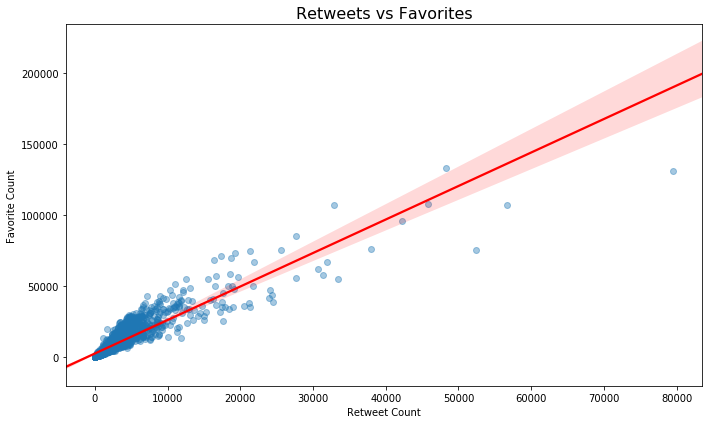

In [57]:
# Scatter plot of retweets vs favorites
plt.figure(figsize=(10,6))
sns.regplot(x='retweet_count', y='favorite_count', data=df_combined,
            scatter_kws={'alpha':0.4}, line_kws={'color':'red'})

plt.title('Retweets vs Favorites', fontsize=16)
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.tight_layout()
plt.show()

### What are  the Top 10 Predicted Dog Breeds?

### Description:
Visualize the top 10 most commonly predicted dog breeds from the p1 column (first image prediction) in <b>image_preds_clean</b>.

### Data used:

image_preds_clean (cleaned)

### Visualization

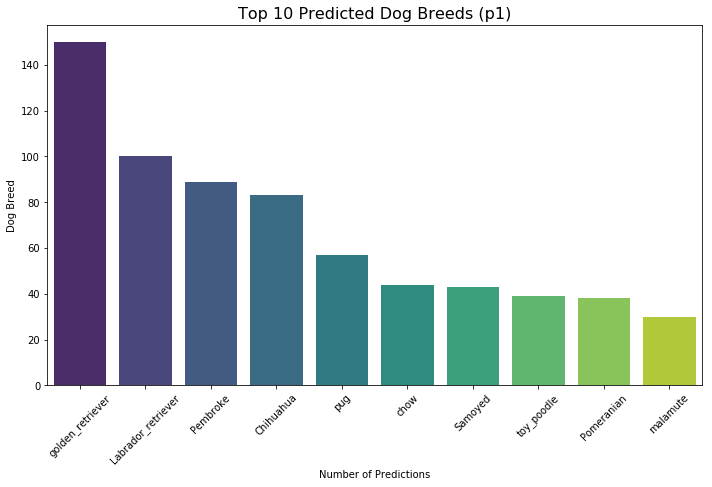

In [58]:
# Get Top 10 Predicted Dog Breeds (from the "p1" column)
top_breeds = image_preds_clean['p1'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_breeds.index, y=top_breeds.values, palette='viridis')
plt.title('Top 10 Predicted Dog Breeds (p1)', fontsize=16)
plt.xlabel('Number of Predictions')
plt.ylabel('Dog Breed')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Insights:
> 1. Tweets with <b>labeled dog stages</b> (doggo, pupper, etc.) tend to get more engagement.

> 2. There is a strong positive correlation between the <b>Retweet Count</b> and the <b>Favorite Count</b> (r = 0.92) for the tweets.
    
> 3. The most common Dog Breeds acording to the <b>first image prediction</b> for ech tweet (p1) are: 
    <ol><li>golden_retriever</li>
    <li>Labrador_retriever</li>
    <li>Pembroke</li>
    <li>Chihuahua</li>
    <li>pug</li>
    <li>chow</li>
    <li>Samoyed</li>
    <li>toy_poodle</li>
    <li>Pomeranianmalamute</li>
    <li>malamute</li><ol>